In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [4]:
diamonds_df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [6]:
features = diamonds_df.select_dtypes(np.number).drop('price', axis=1)

In [ ]:
# class Linear Regression
## initialize - max_iter, learning rate for gradient descent
## other attributes - coefficients

# fit() function to fit the data
## calc. SSE iteratively for different params until max_iter reached OR no change in SSE
## use gradient descent d
## save coeff with best SSE
## return coeff with best SSE

# update_params() use gradient descent to find best coeff
## input - old params
## operation - differentiate and calc slope
## repeat for every coeff. 
## new_coeff = old_coeff - learning_rate*d/dcoeff(loss func.) (check how to do a partial deriv.)
## return new params

In [7]:
features

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [8]:
import statsmodels.api as sm

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [72]:
def calc_preds(features, coeffs, constant):
    y_preds = coeffs.dot(features.T) + np.array(constant)

def gradient_desc(old_coeffs):
    
    # we'll need to add up the values across each coeff*feature vector to make a prediction array
    y_preds = np.sum(old_coeffs*features, axis=1)
    m = features.shape[0]
    
    # calculate the loss for the current value of the coefficients
    loss = ((y - y_preds)**2)/m
    print(np.sum(loss))
    
    # calculate the gradients for each of the features
    gradients = np.array([(-2/m)*np.sum(loss*features[:, ind]) for ind in range(features.shape[1])])
    print(gradients)
    
    # calculate the new coefficients for each of the features
    new_coeff = old_coeffs - learning_rate*gradients
    
    return gradients, new_coeff

In [74]:
y = diamonds_df.price.values
features = sm.add_constant(diamonds_num).values
coeffs = np.zeros(features.shape[1])
learning_rate = 0.00001

epochs = 250
gradients_change = []

for epoch in range(epochs):
    gradients, coeffs = gradient_desc(coeffs)
    gradients_change.append(gradients)

31382248.015257694
[ -1163.59836912  -1786.58155793 -71788.93627578 -67318.92673419
  -8500.61913781  -8498.804215    -5236.39661313]
30724000.93690215
[ -1139.19172921  -1756.10951309 -70281.95979691 -65908.71450039
  -8335.80221364  -8334.00091151  -5134.73385227]
30093280.864596326
[ -1115.80574211  -1726.68522844 -68838.01575825 -64557.34487268
  -8177.36388286  -8175.57743766  -5037.00794096]
29488669.999736466
[ -1093.38783833  -1698.25696394 -67453.85750136 -63261.78840427
  -8024.98065965  -8023.21022646  -4943.01919926]
28908843.23568533
[ -1071.88888527  -1670.77623019 -66126.45063331 -62019.21362952
  -7878.34990747  -7876.59656654  -4852.58081848]
28352561.02436837
[ -1051.26292267  -1644.19754399 -64852.9566908  -60826.97183088
  -7737.1882474   -7735.45301002  -4765.51787858]
27818662.87823815
[ -1031.4669217   -1618.4782052  -63630.7182593  -59682.58316254
  -7601.23010744  -7599.51392122  -4681.66645247]
27306061.44371763
[ -1012.46056521  -1593.57809294 -62457.24540096

[  -274999.31357262   -210172.99601486 -16987188.57144231
 -15812457.05675052  -1554859.125531    -1555765.41286852
   -960474.95980108]
11214483657.174671
[  -415813.2612968    -320743.59269687 -25685365.592103
 -23911015.5611503   -2357781.53954301  -2359127.46626726
  -1456424.52774131]
18445767197.954124
[  -683936.4923231    -532281.62675582 -42247470.17922691
 -39332024.45909671  -3888893.81267891  -3891068.87621103
  -2402150.2892279 ]
34238790245.19537
[ -1269513.91342957   -996360.1402976  -78418758.76779337
 -73012498.0001019   -7237546.38624999  -7241515.69710727
  -4470494.46539972]
76409379256.26518
[-2.83312493e+06 -2.24071754e+06 -1.75003174e+08 -1.62949216e+08
 -1.61908684e+07 -1.61995876e+07 -1.00005800e+07]
230777752104.71475
[-8.55683174e+06 -6.81263865e+06 -5.28556177e+08 -4.92178579e+08
 -4.90033902e+07 -4.90293630e+07 -3.02672663e+07]
1202307590913.4004
[-4.45794435e+07 -3.56726670e+07 -2.75366565e+09 -2.56426014e+09
 -2.55707406e+08 -2.55841283e+08 -1.57937129e+0

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_22989/3849215489.py:11: RuntimeWarning: overflow encountered in square
  loss = ((y - y_preds)**2)/m
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_22989/3849215489.py:15: RuntimeWarning: invalid value encountered in multiply
  gradients = np.array([(-2/m)*np.sum(loss*features[:, ind]) for ind in range(features.shape[1])])


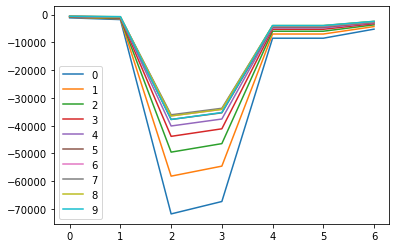

In [64]:
for i in range(10):
    sns.lineplot(x=np.arange(gradients_change.shape[1]), y=gradients_change[i, :])
    
plt.legend(labels=np.arange(10))
plt.show()

In [157]:
class LinearRegression_2():
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.coeffs = None
        self.intercept = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        #print('Shape of feature array', X.shape)
        self.coeffs = np.zeros(n_features)
        print('Shape of coeff array', self.coeffs.shape)
        self.intercept = 0
        
        for i in range(self.n_iters):
            #print('Shape of feature array', X.shape)
            
            y_preds = np.dot(X, self.coeffs) + self.intercept
            
            pd_coeff = (1/n_samples)*2*np.dot(X.T, (y_preds-y))
            pd_i = (1/n_samples)*2*np.sum(y_preds-y)
            
            self.coeffs -= self.lr * pd_coeff
            
            self.intercept -= self.lr * pd_i
            print(self.coeffs, self.intercept)
        
    def predict(self, X):
        y_preds = np.dot(X, self.coeff) + self.intercept
        return y_preds

In [125]:
y = diamonds_df.price.values
X = diamonds_num.values

In [118]:
features.shape

(53940, 6)

In [158]:
lin_reg = LinearRegression_2()

lin_reg.fit(X, y)

Shape of coeff array (6,)
Shape of feature array (53940, 6)
[  9.76174055 485.57437963 454.2017879   52.9948832   52.99187957
  32.68359776] 7.865599443826474
Shape of feature array (53940, 6)
[  -71.48254461 -6047.18433772 -5624.76812543  -546.03036874
  -546.39801724  -337.28547629] -97.90880787209498
Shape of feature array (53940, 6)
[ 1065.8771601  81420.96154244 75798.61156325  7587.1270315
  7591.22847677  4685.28054488] 1318.3659942511242
Shape of feature array (53940, 6)
[  -14118.51838386 -1090118.81781423 -1014747.54756659  -101235.56058704
  -101291.74096434   -62517.90279787] -17651.037671377795
Shape of feature array (53940, 6)
[  189303.46530737 14600959.91689617 13591569.07628293  1356398.04839212
  1357148.82269288   837639.55055489] 236416.69339738676
Shape of feature array (53940, 6)
[-2.53519597e+06 -1.95558722e+08 -1.82039237e+08 -1.81664203e+07
 -1.81764780e+07 -1.12186215e+07] -3166459.1574005927
Shape of feature array (53940, 6)
[3.39556420e+07 2.61923090e+09 2.4

 -7.80930781e+234 -4.81994739e+234] -1.3604280899514812e+234
Shape of feature array (53940, 6)
[1.45885889e+235 1.12531843e+237 1.04752230e+237 1.04536682e+236
 1.04594557e+236 6.45563311e+235] 1.822099686609028e+235
Shape of feature array (53940, 6)
[-1.95393373e+236 -1.50720378e+238 -1.40300695e+238 -1.40011999e+237
 -1.40089513e+237 -8.64640120e+236] -2.440443043232903e+236
Shape of feature array (53940, 6)
[2.61701597e+237 2.01868481e+239 1.87912800e+239 1.87526133e+238
 1.87629953e+238 1.15806231e+238] 3.268625910554701e+237
Shape of feature array (53940, 6)
[-3.50512020e+238 -2.70374083e+240 -2.51682435e+240 -2.51164549e+239
 -2.51303601e+239 -1.55105954e+239] -4.377858919008557e+238
Shape of feature array (53940, 6)
[4.69460933e+239 3.62127579e+241 3.37092779e+241 3.36399145e+240
 3.36585386e+240 2.07742336e+240] 5.863518566886189e+239
Shape of feature array (53940, 6)
[-6.28776064e+240 -4.85018322e+242 -4.51487772e+242 -4.50558748e+241
 -4.50808191e+241 -2.78241275e+241] -7.853

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_22989/1040929321.py:24: RuntimeWarning: invalid value encountered in subtract
  self.coeffs -= self.lr * pd_coeff


[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of f

[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of f

[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of feature array (53940, 6)
[nan nan nan nan nan nan] nan
Shape of f